In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
df = pd.read_csv("reviews.csv")
df.comments

0          Perfect location!! Nasrine was a delight and m...
1          This is a nice place in a great location in Pa...
2          Nice studio, very clean, very quiet, in a grea...
3          Superb location, great studio. \r<br/>A slice ...
4          Perfect place to be in Paris, walking home eve...
                                 ...                        
1344656                   Great location to stay at in Paris
1344657                   Apparemment bien situé, pratique !
1344658                                             Très pro
1344659    Un logement sympa, agréable et accessible. Pas...
1344660    Wonderful host and apartment.  It’s very large...
Name: comments, Length: 1344661, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344661 entries, 0 to 1344660
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1344661 non-null  int64 
 1   id             1344661 non-null  int64 
 2   date           1344661 non-null  object
 3   reviewer_id    1344661 non-null  int64 
 4   reviewer_name  1344661 non-null  object
 5   comments       1344584 non-null  object
dtypes: int64(3), object(3)
memory usage: 61.6+ MB


In [17]:
df['comments'] = df['comments'].astype(str)

# Define stopwords and compile regular expression pattern
english_stop_words = set(stopwords.words('english'))
french_stop_words = set(stopwords.words('french'))

pattern = re.compile(r'[^a-zA-Z\s]')

df_replacements = {'<br/>': ' ', ',': ' ', '<br>': ' '}
df['comments'] = df['comments'].replace(df_replacements, regex=True)

In [18]:
def process_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = pattern.sub('', text.lower())

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in english_stop_words and word not in french_stop_words]

    # Join the tokens back into a sentence
    processed_text = ' '.join(tokens)

    return processed_text

# Apply text processing function to the 'comments' column
df['comments'] = df['comments'].apply(process_text)
text = ' '.join(df['comments'])

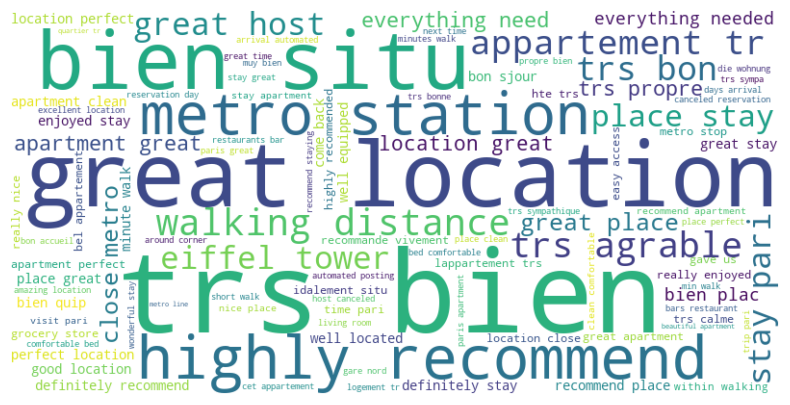

In [19]:
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate_from_text(text)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.savefig('Reviewswordcloud.png', bbox_inches='tight', dpi=400)